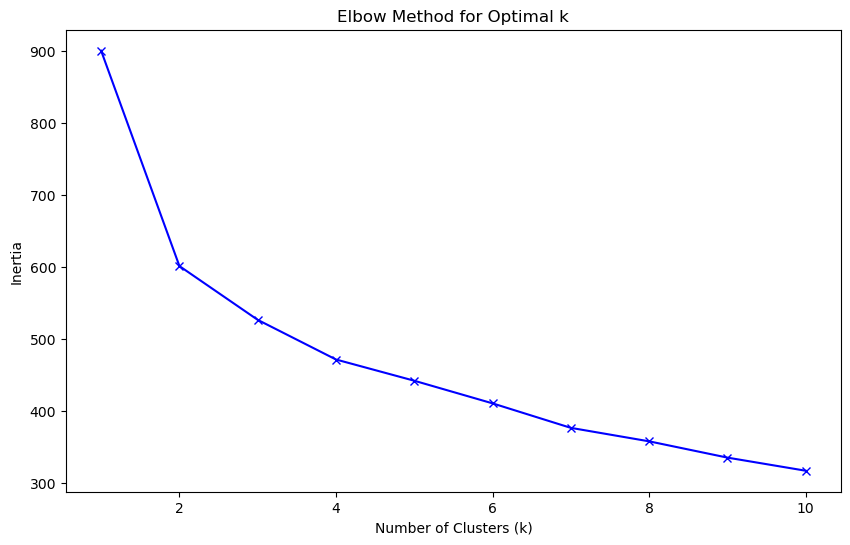

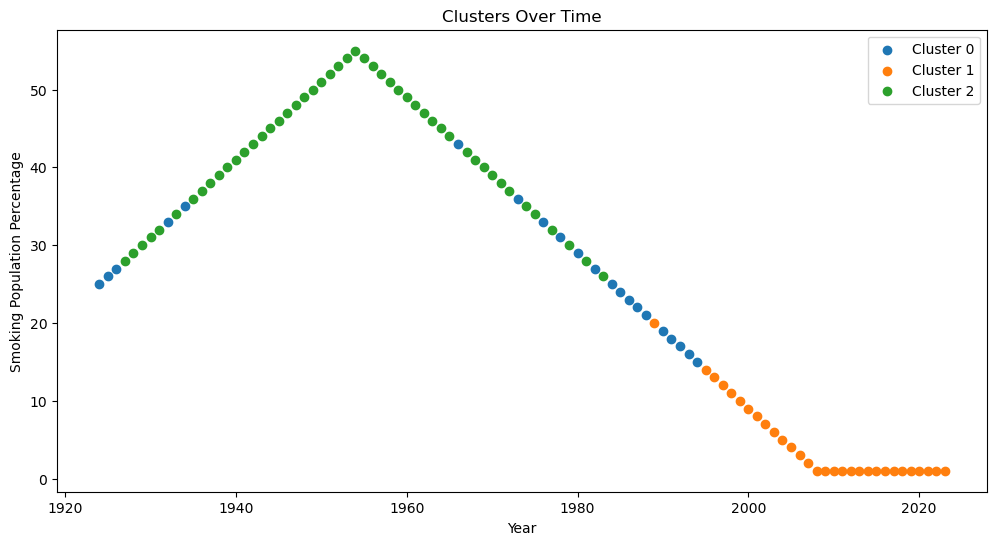

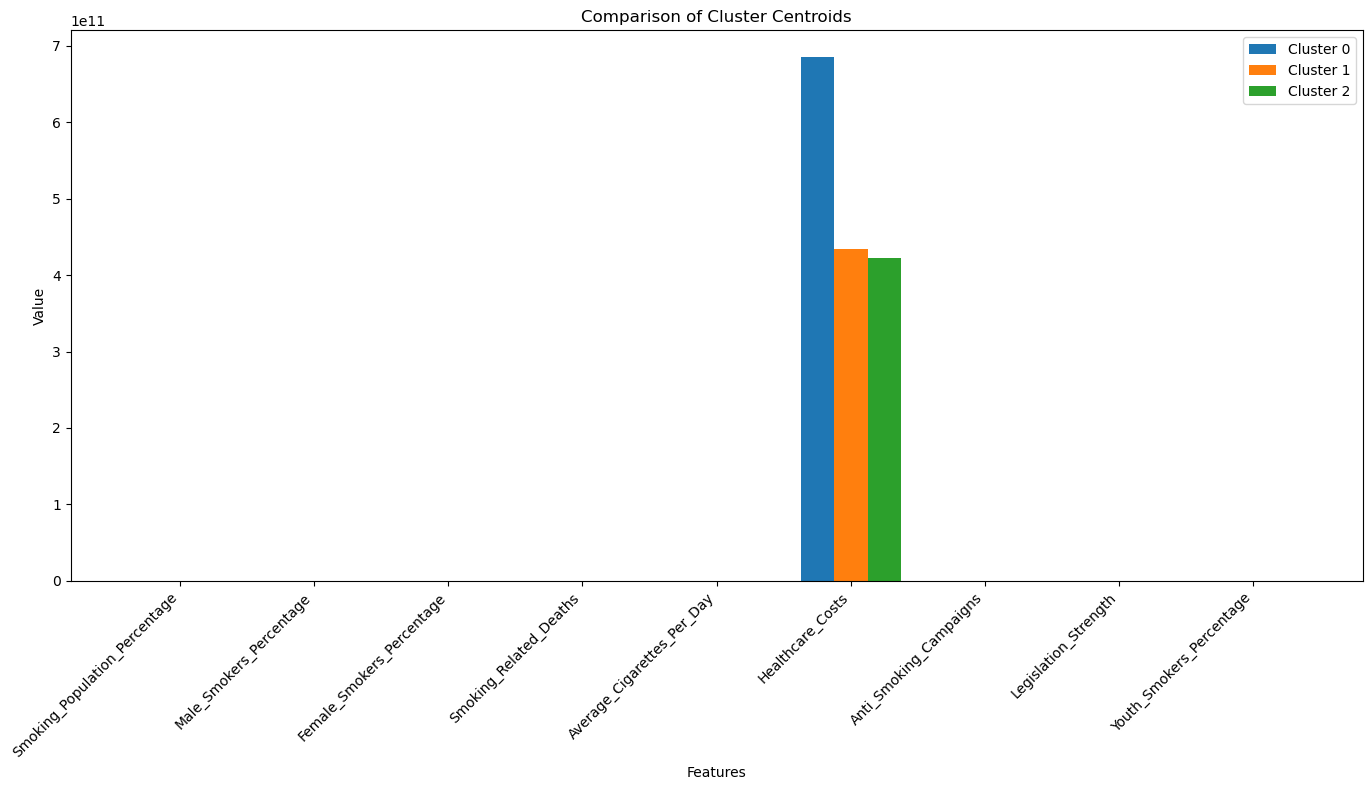

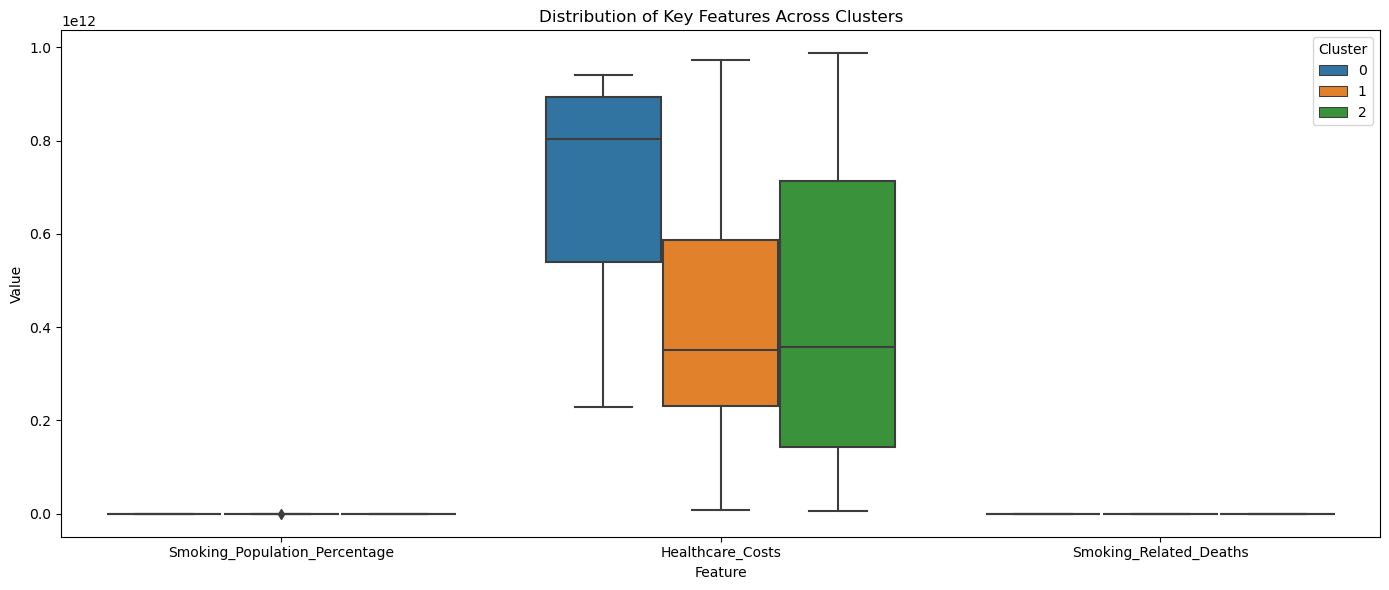


Cluster 0 Summary:
Number of data points: 21
Average Smoking Population Percentage: 25.95%
Average Healthcare Costs: $685,710,237,804.05
Average Smoking Related Deaths: 552982
Most common countries: USA, Germany, Russia
--------------------------------------------------

Cluster 1 Summary:
Number of data points: 30
Average Smoking Population Percentage: 4.67%
Average Healthcare Costs: $433,657,681,508.43
Average Smoking Related Deaths: 466419
Most common countries: China, UK, Germany
--------------------------------------------------

Cluster 2 Summary:
Number of data points: 49
Average Smoking Population Percentage: 41.94%
Average Healthcare Costs: $422,087,752,782.00
Average Smoking Related Deaths: 568336
Most common countries: France, China, Brazil
--------------------------------------------------

Cluster 0 - First few data points:
Country  Year  Cluster  Smoking_Population_Percentage  Male_Smokers_Percentage  Female_Smokers_Percentage  Smoking_Related_Deaths  Average_Cigarettes_

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned.csv')

# Select features for clustering
features = ['Smoking_Population_Percentage', 'Male_Smokers_Percentage', 
            'Female_Smokers_Percentage', 'Smoking_Related_Deaths', 
            'Average_Cigarettes_Per_Day', 'Healthcare_Costs', 
            'Anti_Smoking_Campaigns', 'Legislation_Strength', 
            'Youth_Smokers_Percentage']

# Prepare the data
X = df[features]
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visual 1: Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
n_clusters = 3  # You may adjust this after viewing the elbow plot

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visual 2: Clusters Over Time
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Year'], cluster_data['Smoking_Population_Percentage'], 
                label=f'Cluster {i}')
plt.xlabel('Year')
plt.ylabel('Smoking Population Percentage')
plt.title('Clusters Over Time')
plt.legend()
plt.show()

# Visual 3: Cluster Centroids Comparison
centroid_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroid_df = centroid_df.T  # Transpose for easier plotting

plt.figure(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(features))

for i in range(n_clusters):
    plt.bar(index + i*bar_width, centroid_df[i], bar_width, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Comparison of Cluster Centroids')
plt.xticks(index + bar_width, features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Visual 4: Box Plot of Key Features
key_features = ['Smoking_Population_Percentage', 'Healthcare_Costs', 'Smoking_Related_Deaths']
plt.figure(figsize=(14, 6))
df_melt = df.melt(id_vars=['Cluster'], value_vars=key_features, var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melt)
plt.xticks(rotation=0)
plt.title('Distribution of Key Features Across Clusters')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Print cluster summaries
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(f"Number of data points: {len(cluster_data)}")
    print(f"Average Smoking Population Percentage: {cluster_data['Smoking_Population_Percentage'].mean():.2f}%")
    print(f"Average Healthcare Costs: ${cluster_data['Healthcare_Costs'].mean():,.2f}")
    print(f"Average Smoking Related Deaths: {cluster_data['Smoking_Related_Deaths'].mean():.0f}")
    print(f"Most common countries: {', '.join(cluster_data['Country'].value_counts().nlargest(3).index)}")
    print("-" * 50)

# New section: Output detailed cluster information
# Sort the dataframe by cluster and year for easier reading
df_sorted = df.sort_values(['Cluster', 'Year'])

# Select columns for output
columns_to_output = ['Country', 'Year', 'Cluster'] + features

# Save to CSV
df_sorted[columns_to_output].to_csv('clustered_smoking_data.csv', index=False)

# Print the first few rows of each cluster
for i in range(n_clusters):
    print(f"\nCluster {i} - First few data points:")
    cluster_data = df_sorted[df_sorted['Cluster'] == i]
    print(cluster_data[columns_to_output].head().to_string(index=False))
    print("-" * 50)

print("\nFull clustered dataset has been saved to 'clustered_smoking_data.csv'")